<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C3_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Time Series Data

The above plot shows a synthetic time series dataset created by combining three components: trend, seasonality, and noise. This dataset spans 200 days and is intended to illustrate key characteristics of time series data.

- **Trend:** A long-term increase in the data is visible from left to right.
- **Seasonality:** The oscillating pattern observed in the data reflects seasonal variations.
- **Noise:** Random fluctuations add variability to the overall pattern.


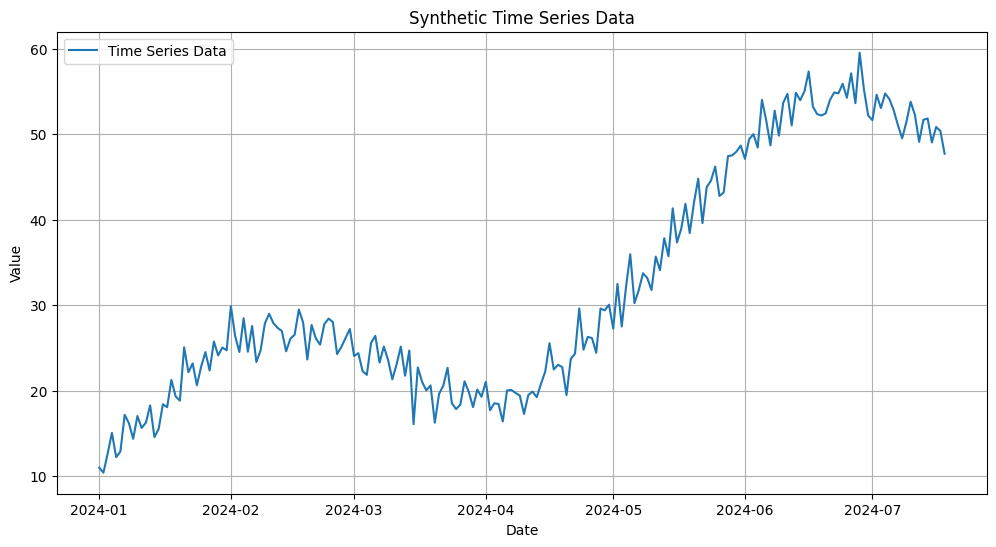

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic time series data
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=200, freq='D')
trend = np.linspace(10, 50, 200)
seasonality = 10 * np.sin(np.linspace(0, 3*np.pi, 200))
noise = np.random.normal(0, 2, 200)
time_series_data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': time_series_data})
df.set_index('Date', inplace=True)

# Plot the synthetic time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Time Series Data')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Time Series Decomposition

The above plots display the results of decomposing the synthetic time series into its three main components:

1. **Original Time Series:** This is the complete data as seen in the previous plot.
2. **Trend Component:** This plot shows the underlying long-term trend in the data, which steadily increases over time.
3. **Seasonal Component:** The oscillating pattern that repeats at regular intervals (approximately every 30 days) is captured here.
4. **Residual (Noise) Component:** This plot shows the random noise or irregularities that remain after removing the trend and seasonal components.

By breaking down the time series, we can better understand the data's structure and make more accurate forecasts.


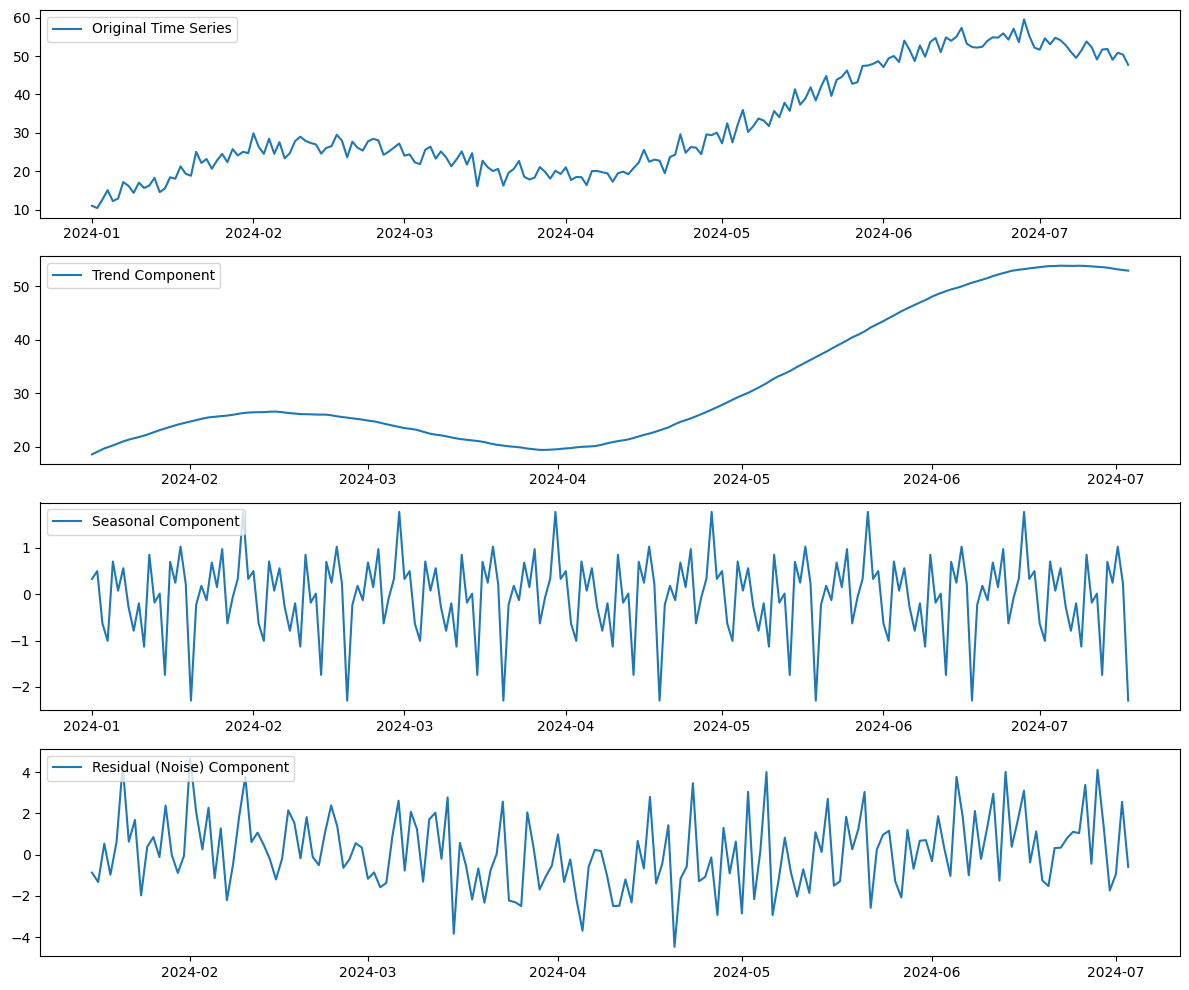

In [3]:
# Import the decomposition tool from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Value'], label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual (Noise) Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
